### Dataset : Crime Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('crime_data.csv')

In [3]:
data

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4      249        66  22.2
18           Maine     2.1       83        51   7.8
19        Maryland    11.3      300        67  27.8
20   Massachusetts     4.4      149        85  16.3
21        Michigan    12.1      255        74  35.1
22       Minnesota     2.7       72        66  14.9
23     Mississippi    16.1      259        44  17.1
24        Missouri     9.0      178        70  28.2
25         Montana     6.0      109        53  16.4
26        Nebraska     4.3      102        62  16.5
27          Nevada    12.2      252        81  46.0
28   New Hampshire     2.1       57        56   9.5
29      New Jersey     7.4      159        89  18.8
30      New Mexico    11.4      285        70  32.1
31        New York    11.1      254        86  26.1
32  North Carolina    13.0      337        45  16.1
33    North Dakota     0.8       45        44   7.3
34            Ohio     7.3      120        75  21.4
35        Oklahoma     6.6      151        68  20.0
36          Oregon     4.9      159        67  29.3
37    Pennsylvania     6.3      106        72  14.9
38    Rhode Island     3.4      174        87   8.3
39  South Carolina    14.4      279        48  22.5
40    South Dakota     3.8       86        45  12.8
41       Tennessee    13.2      188        59  26.9
42           Texas    12.7      201        80  25.5
43            Utah     3.2      120        80  22.9
44         Vermont     2.2       48        32  11.2
45        Virginia     8.5      156        63  20.7
46      Washington     4.0      145        73  26.2
47   West Virginia     5.7       81        39   9.3
48       Wisconsin     2.6       53        66  10.8
49         Wyoming     6.8      161        60  15.6

         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000


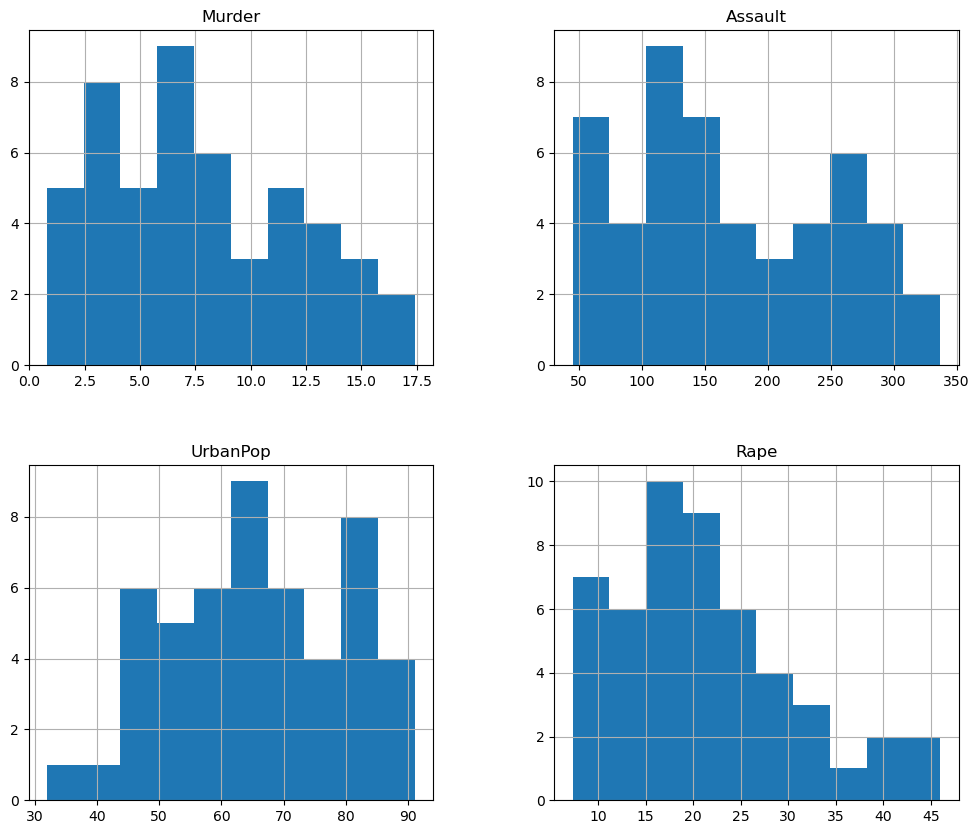

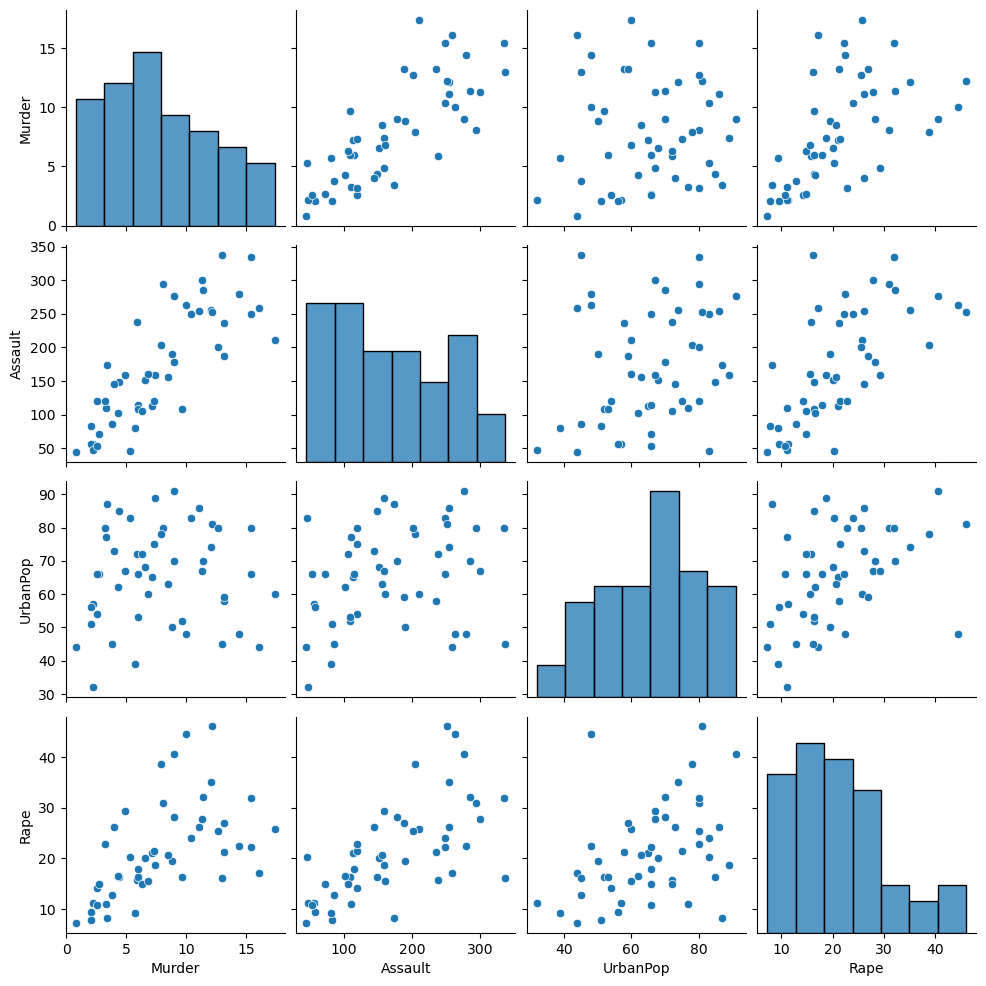

In [4]:
# Summary Statistics
print(data.describe())

# Univariate Analysis (Histograms)
data.hist(figsize=(12, 10))
plt.show()

# Bivariate Analysis (Pairplot)
sns.pairplot(data)
plt.show()


In [5]:
# Handling missing values
data.fillna(method='ffill', inplace=True)

# Convert categorical data to numerical (if any)
data = pd.get_dummies(data)

# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1252\1117432820.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

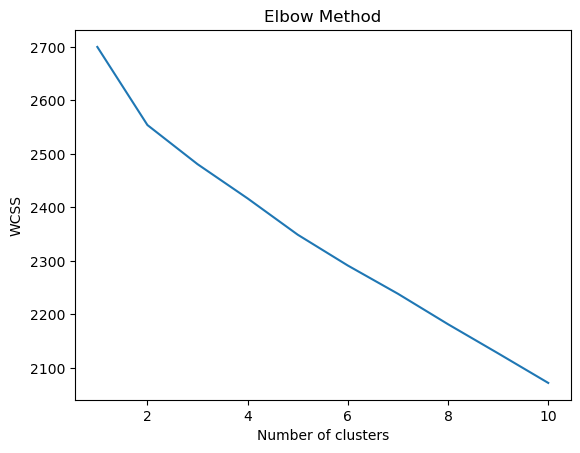

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

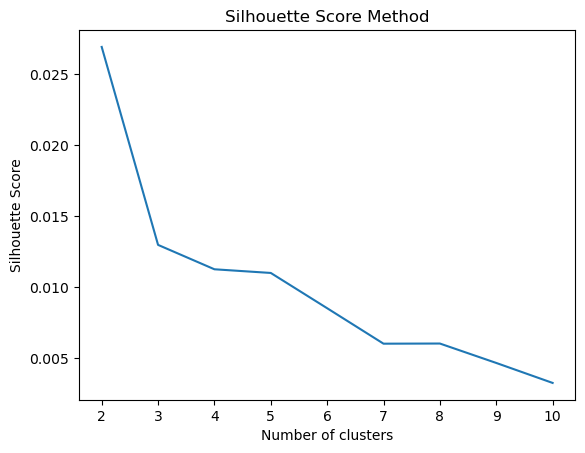

In [7]:
silhouette_scores = []
for n_clusters in range(2, 11):
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    preds = clusterer.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, preds))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


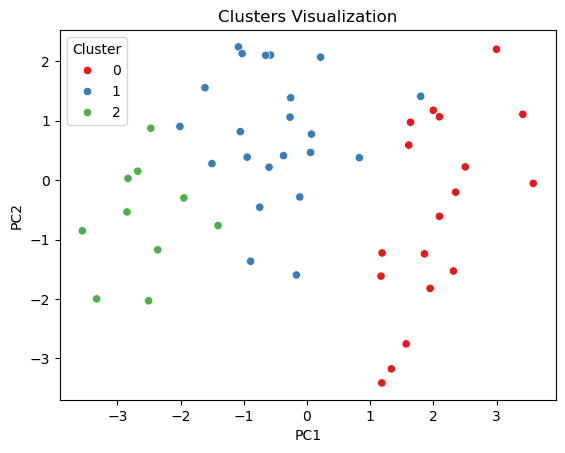

In [8]:
# Assume optimal number of clusters is 3 based on the above methods
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(scaled_data)

# Assign cluster labels to original data
data['Cluster'] = kmeans.labels_

# Visualizing the clusters using PCA (for 2D visualization)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_

sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('Clusters Visualization')
plt.show()


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


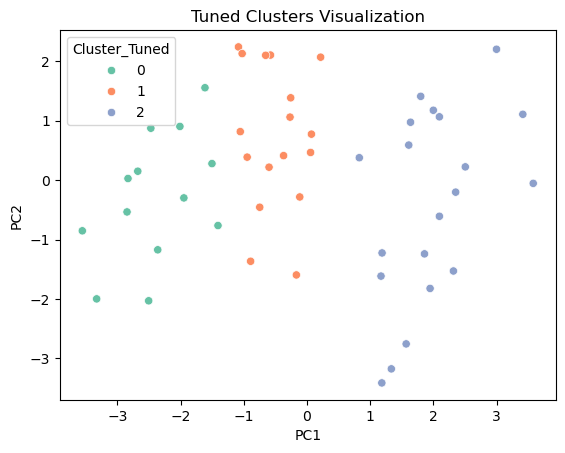

In [9]:
# You can explore different initializations or algorithms
# For example, try using different values for `n_init` or `max_iter`

# Example: Re-running with different n_init
kmeans_tuned = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=500, n_init=20, random_state=42)
kmeans_tuned.fit(scaled_data)

# Re-assign cluster labels and re-visualize if needed
data['Cluster_Tuned'] = kmeans_tuned.labels_

# Visualize the tuned clusters
pca_df['Cluster_Tuned'] = kmeans_tuned.labels_

sns.scatterplot(x='PC1', y='PC2', hue='Cluster_Tuned', data=pca_df, palette='Set2')
plt.title('Tuned Clusters Visualization')
plt.show()

### Dataset: EastWestAirlines.xlsx 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [11]:
data = pd.read_excel('EastWestAirlines.xlsx')
data

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

               ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      

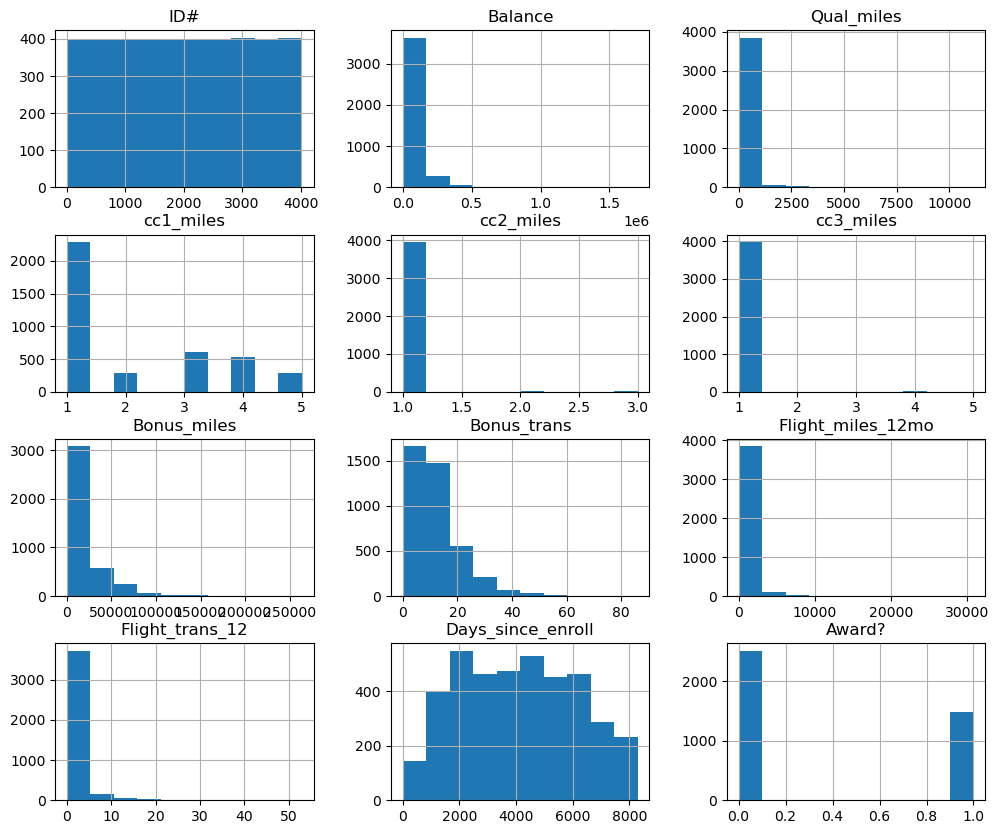

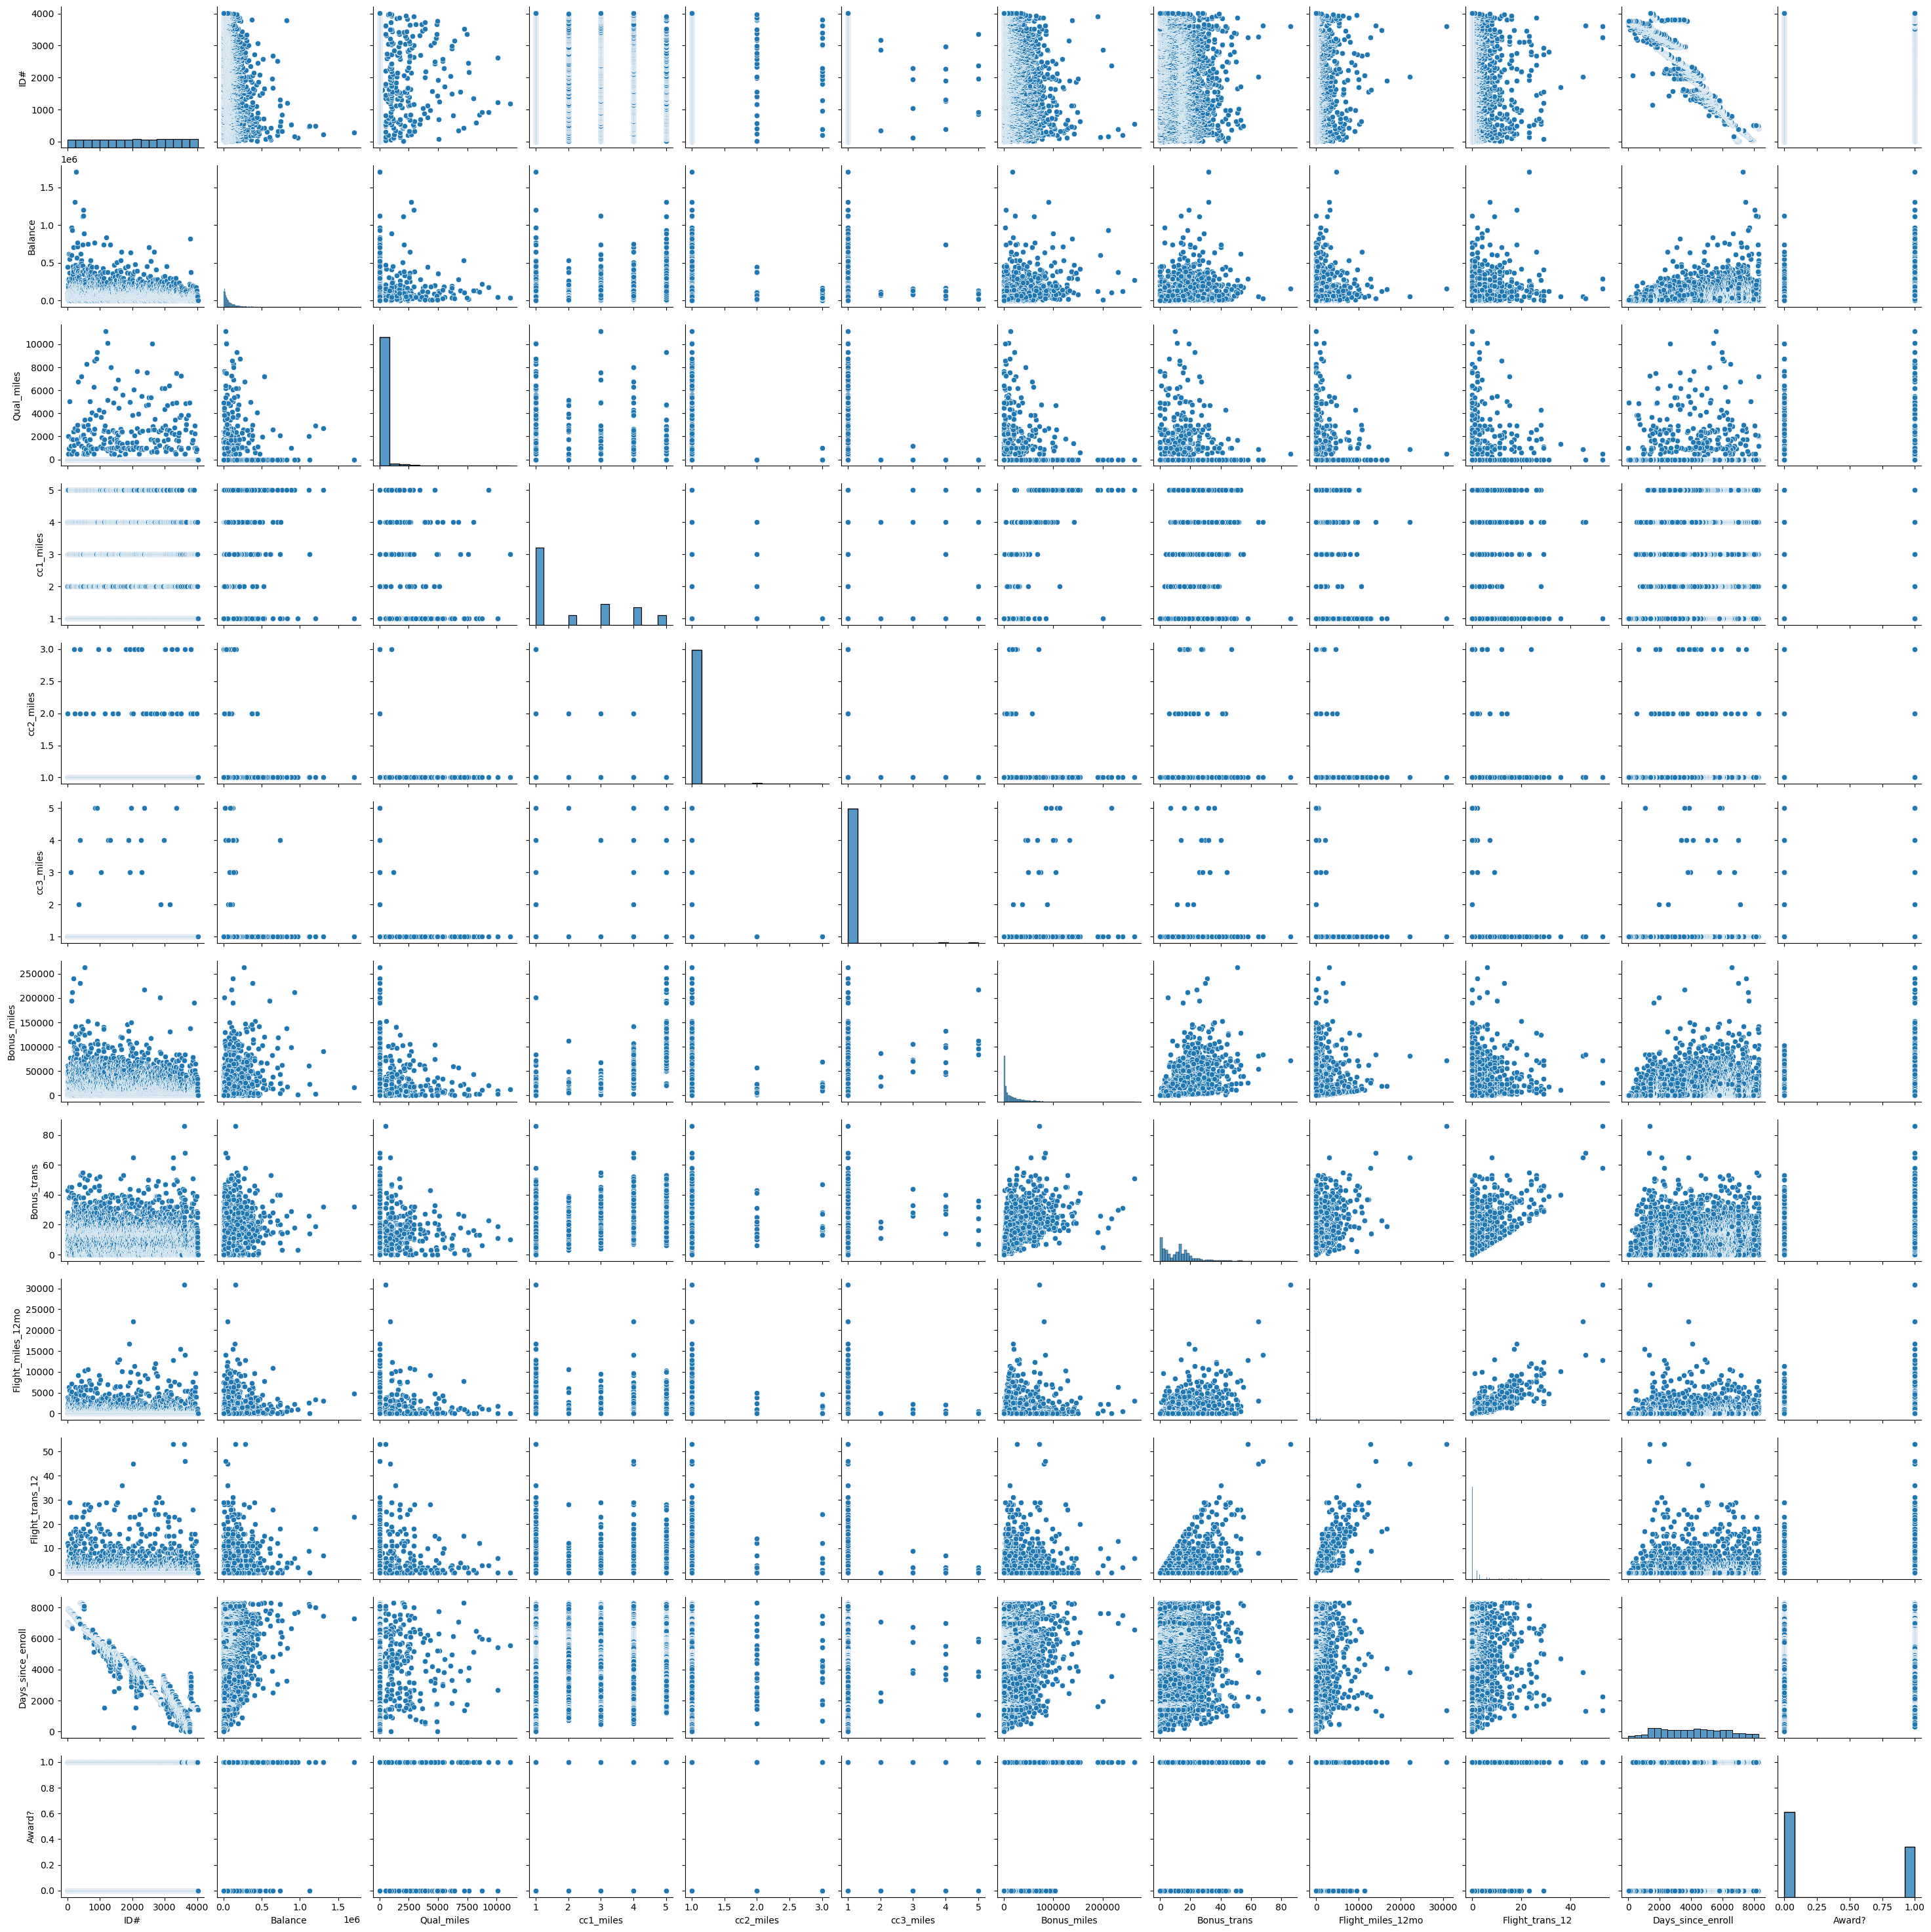

In [12]:
# Summary Statistics
print(data.describe())

# Univariate Analysis (Histograms)
data.hist(figsize=(12, 10))
plt.show()

# Bivariate Analysis (Pairplot)
sns.pairplot(data)
plt.show()

In [18]:
# Handle missing values
data.fillna(method='ffill', inplace=True)

# Convert categorical data to numerical (if any)
data = pd.get_dummies(data)

# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1252\2679183170.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


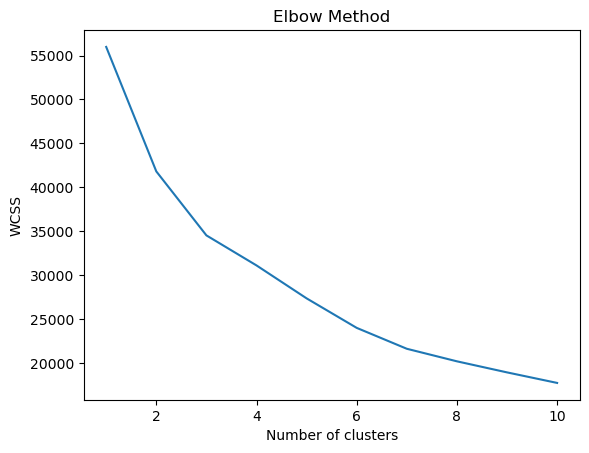

In [19]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

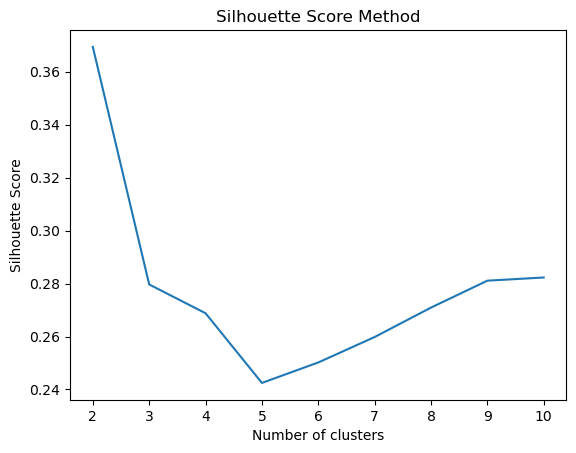

In [20]:
silhouette_scores = []
for n_clusters in range(2, 11):
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    preds = clusterer.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, preds))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

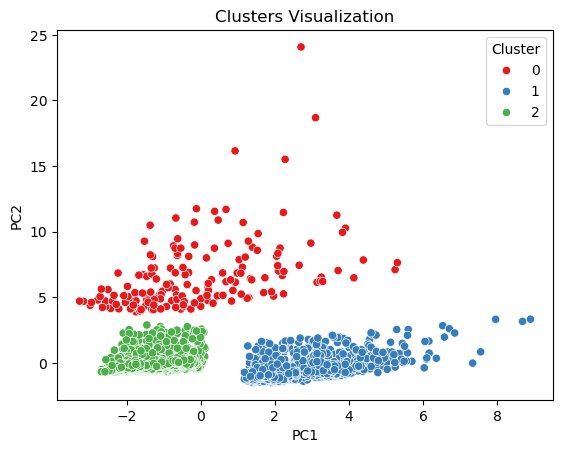

In [21]:
# Assume optimal number of clusters is 3 based on the above methods
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(scaled_data)

# Assign cluster labels to original data
data['Cluster'] = kmeans.labels_

# Visualizing the clusters using PCA (for 2D visualization)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_

sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('Clusters Visualization')
plt.show()

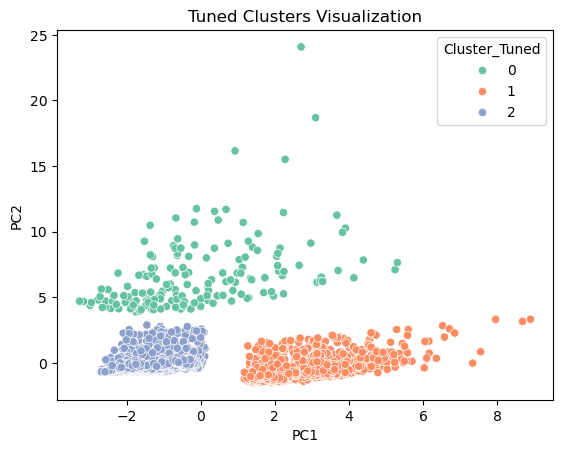

In [22]:
# You can explore different initializations or algorithms
# For example, try using different values for `n_init` or `max_iter`

# Example: Re-running with different n_init
kmeans_tuned = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=500, n_init=20, random_state=42)
kmeans_tuned.fit(scaled_data)

# Re-assign cluster labels and re-visualize if needed
data['Cluster_Tuned'] = kmeans_tuned.labels_

# Visualize the tuned clusters
pca_df['Cluster_Tuned'] = kmeans_tuned.labels_

sns.scatterplot(x='PC1', y='PC2', hue='Cluster_Tuned', data=pca_df, palette='Set2')
plt.title('Tuned Clusters Visualization')
plt.show()

### Dataset: Insurance_Dataset.csv 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [17]:
data = pd.read_csv('insurance_Dataset.csv')

In [18]:
data

Premiums Paid  Age  Days to Renew   Claims made  Income
0            2800   26            233   3890.076336   28000
1            2950   27            130   2294.444444   29500
2            3100   28            144   2564.545455   31000
3            3250   30             65   1978.260870   32500
4            3400   32             56   2009.090909   34000
..            ...  ...            ...           ...     ...
95          25575   63             76  16161.979170  170500
96          25800   62            166  23715.151520  172000
97          26025   59            167  24043.401020  173500
98          26250   58            245  40147.058820  175000
99          26475   52            261  46781.067960  176500

[100 rows x 5 columns]

       Premiums Paid         Age  Days to Renew   Claims made         Income
count     100.000000  100.000000     100.000000    100.000000     100.000000
mean    12542.250000   46.110000     120.400000  12578.993367  102250.000000
std      6790.731666   13.887641      88.055767  13695.906762   43517.237964
min      2800.000000   23.000000       1.000000   1978.260870   28000.000000
25%      6975.000000   34.000000      56.000000   5220.648735   65125.000000
50%     11825.000000   45.000000      89.000000   8386.043907  102250.000000
75%     15475.000000   54.500000     186.500000  14670.889520  139375.000000
max     29900.000000   82.000000     321.000000  99676.744190  176500.000000


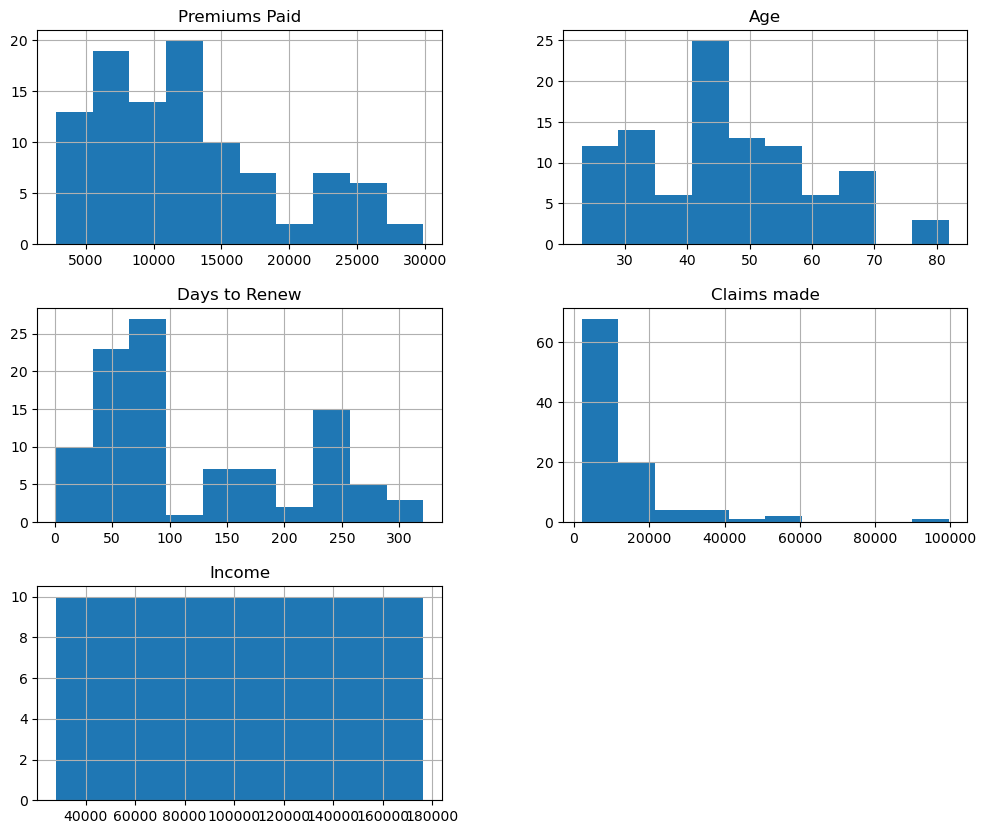

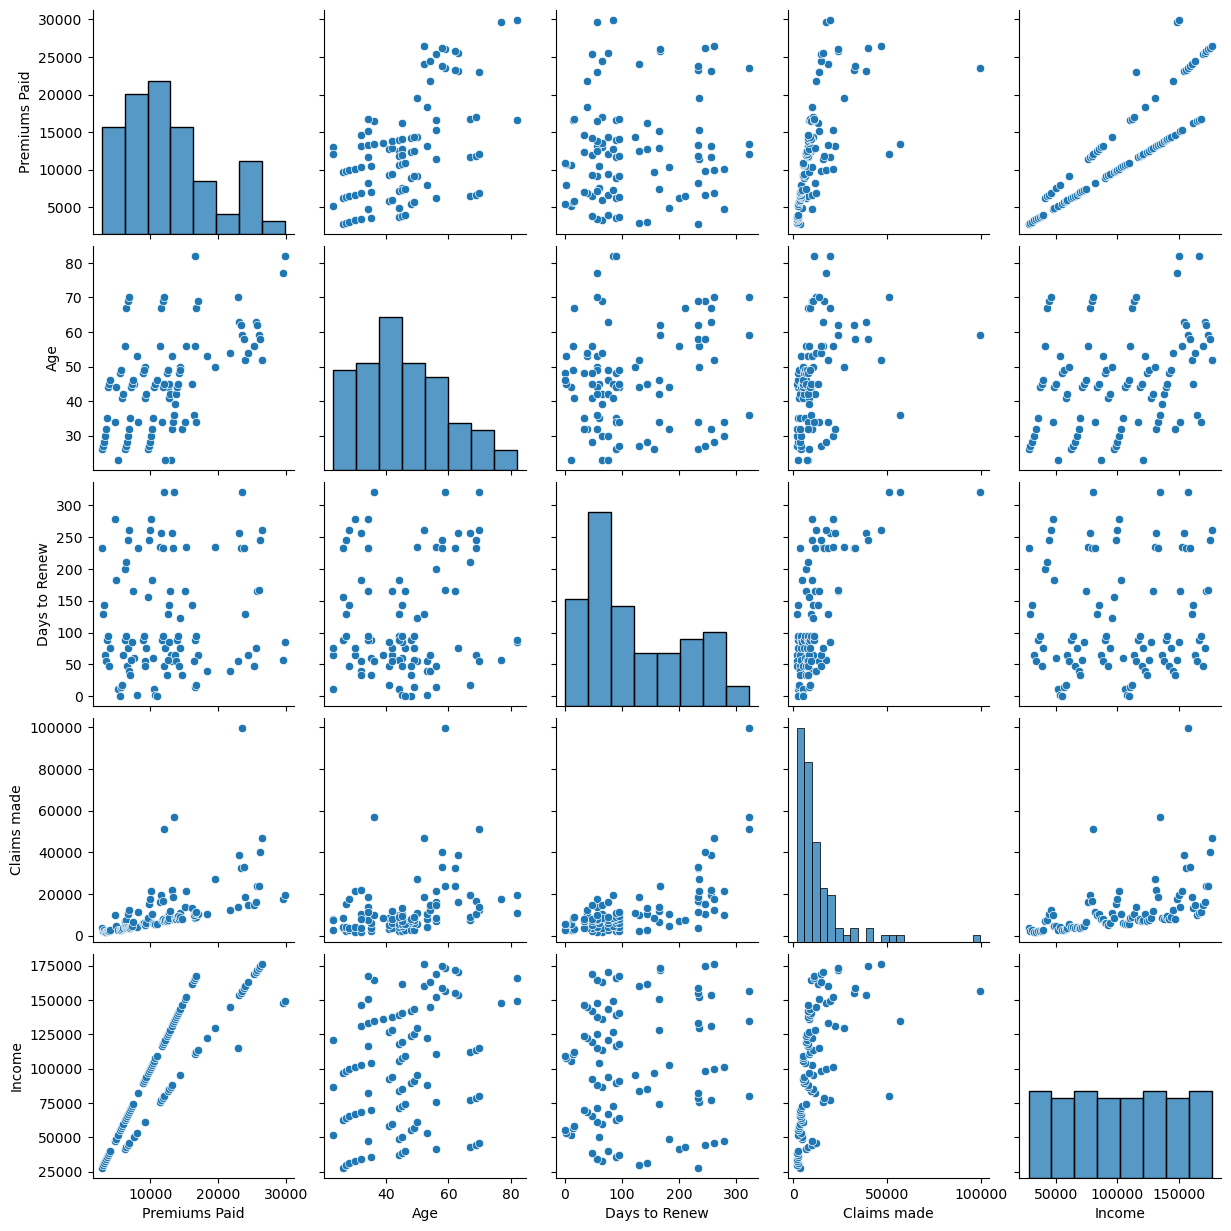

In [19]:
# Summary Statistics
print(data.describe())

# Univariate Analysis (Histograms)
data.hist(figsize=(12, 10))
plt.show()

# Bivariate Analysis (Pairplot)
sns.pairplot(data)
plt.show()

In [20]:
# Handle missing values
data.fillna(method='ffill', inplace=True)

# Convert categorical data to numerical (if any)
data = pd.get_dummies(data)

# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17512\2679183170.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

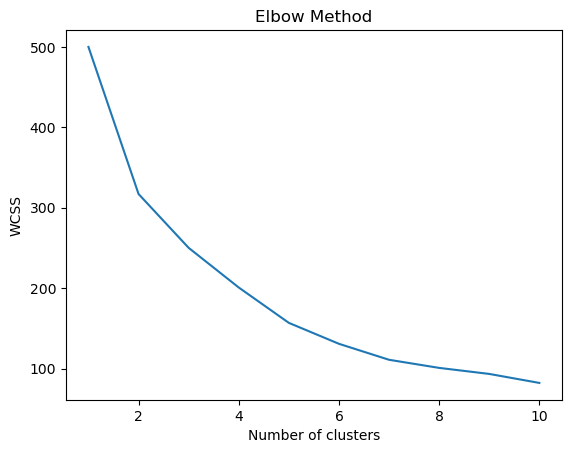

In [21]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

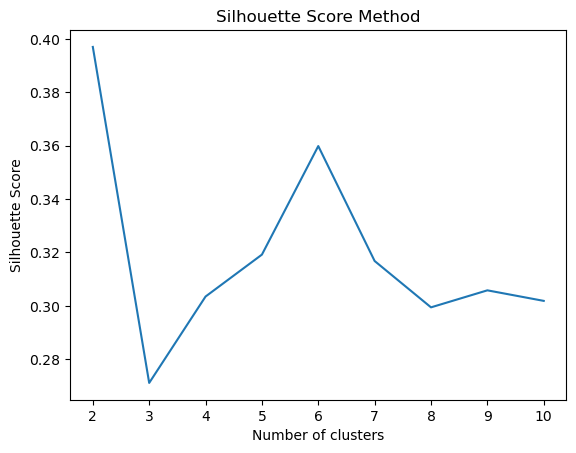

In [22]:
silhouette_scores = []
for n_clusters in range(2, 11):
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    preds = clusterer.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, preds))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


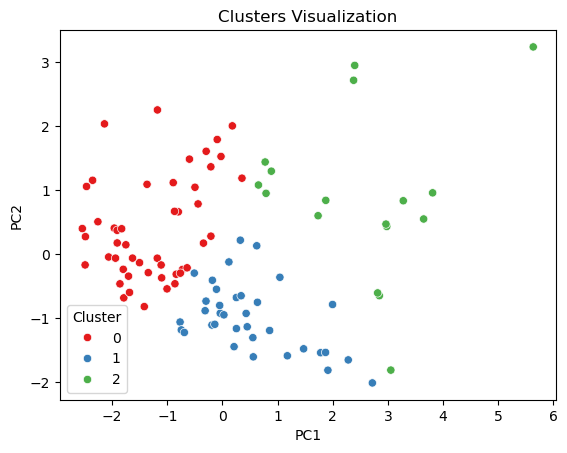

In [23]:
# Assume optimal number of clusters is 3 based on the above methods
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(scaled_data)

# Assign cluster labels to original data
data['Cluster'] = kmeans.labels_

# Visualizing the clusters using PCA (for 2D visualization)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_

sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('Clusters Visualization')
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


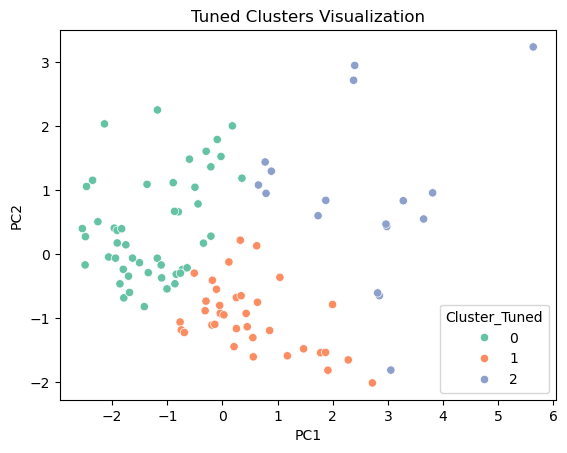

In [24]:
# You can explore different initializations or algorithms
# For example, try using different values for `n_init` or `max_iter`

# Example: Re-running with different n_init
kmeans_tuned = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=500, n_init=20, random_state=42)
kmeans_tuned.fit(scaled_data)

# Re-assign cluster labels and re-visualize if needed
data['Cluster_Tuned'] = kmeans_tuned.labels_

# Visualize the tuned clusters
pca_df['Cluster_Tuned'] = kmeans_tuned.labels_

sns.scatterplot(x='PC1', y='PC2', hue='Cluster_Tuned', data=pca_df, palette='Set2')
plt.title('Tuned Clusters Visualization')
plt.show()

### Dataset: Telco_customer_churn.xlsx 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_excel('Telco_customer_churn.xlsx')
data

Customer ID  Count Quarter Referred a Friend  Number of Referrals  \
0     8779-QRDMV      1      Q3                No                    0   
1     7495-OOKFY      1      Q3               Yes                    1   
2     1658-BYGOY      1      Q3                No                    0   
3     4598-XLKNJ      1      Q3               Yes                    1   
4     4846-WHAFZ      1      Q3               Yes                    1   
...          ...    ...     ...               ...                  ...   
7038  2569-WGERO      1      Q3                No                    0   
7039  6840-RESVB      1      Q3               Yes                    1   
7040  2234-XADUH      1      Q3               Yes                    4   
7041  4801-JZAZL      1      Q3               Yes                    1   
7042  3186-AJIEK      1      Q3                No                    0   

      Tenure in Months    Offer Phone Service  \
0                    1      NaN            No   
1                    8  Offer E           Yes   
2                   18  Offer D           Yes   
3                   25  Offer C           Yes   
4                   37  Offer C           Yes   
...                ...      ...           ...   
7038                72      NaN           Yes   
7039                24  Offer C           Yes   
7040                72      NaN           Yes   
7041                11      NaN            No   
7042                66      NaN           Yes   

      Avg Monthly Long Distance Charges Multiple Lines  ... Unlimited Data  \
0                                  0.00             No  ...             No   
1                                 48.85            Yes  ...            Yes   
2                                 11.33            Yes  ...            Yes   
3                                 19.76             No  ...            Yes   
4                                  6.33            Yes  ...            Yes   
...                                 ...            ...  ...            ...   
7038                              22.77             No  ...             No   
7039                              36.05            Yes  ...            Yes   
7040                              29.66            Yes  ...            Yes   
7041                               0.00             No  ...            Yes   
7042                              30.96             No  ...            Yes   

            Contract  Paperless Billing   Payment Method Monthly Charge  \
0     Month-to-Month                Yes  Bank Withdrawal          39.65   
1     Month-to-Month                Yes      Credit Card          80.65   
2     Month-to-Month                Yes  Bank Withdrawal          95.45   
3     Month-to-Month                Yes  Bank Withdrawal          98.50   
4     Month-to-Month                Yes  Bank Withdrawal          76.50   
...              ...                ...              ...            ...   
7038        Two Year                Yes  Bank Withdrawal          21.15   
7039        One Year                Yes     Mailed Check          84.80   
7040        One Year                Yes      Credit Card         103.20   
7041  Month-to-Month                Yes  Bank Withdrawal          29.60   
7042        Two Year                Yes  Bank Withdrawal         105.65   

     Total Charges Total Refunds Total Extra Data Charges  \
0            39.65          0.00                       20   
1           633.30          0.00                        0   
2          1752.55         45.61                        0   
3          2514.50         13.43                        0   
4          2868.15          0.00                        0   
...            ...           ...                      ...   
7038       1419.40         19.31                        0   
7039       1990.50         48.23                        0   
7040       7362.90         45.38                        0   
7041        346.45         27.24                        0   
7042       6844.50

        Count  Number of Referrals  Tenure in Months  \
count  7043.0          7043.000000       7043.000000   
mean      1.0             1.951867         32.386767   
std       0.0             3.001199         24.542061   
min       1.0             0.000000          1.000000   
25%       1.0             0.000000          9.000000   
50%       1.0             0.000000         29.000000   
75%       1.0             3.000000         55.000000   
max       1.0            11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        7043.000000              7043.000000   
mean                           22.958954                20.515405   
std                            15.448113                20.418940   
min                             0.000000                 0.000000   
25%                             9.210000                 3.000000   
50%                            22.890000                17.000000   
75%         

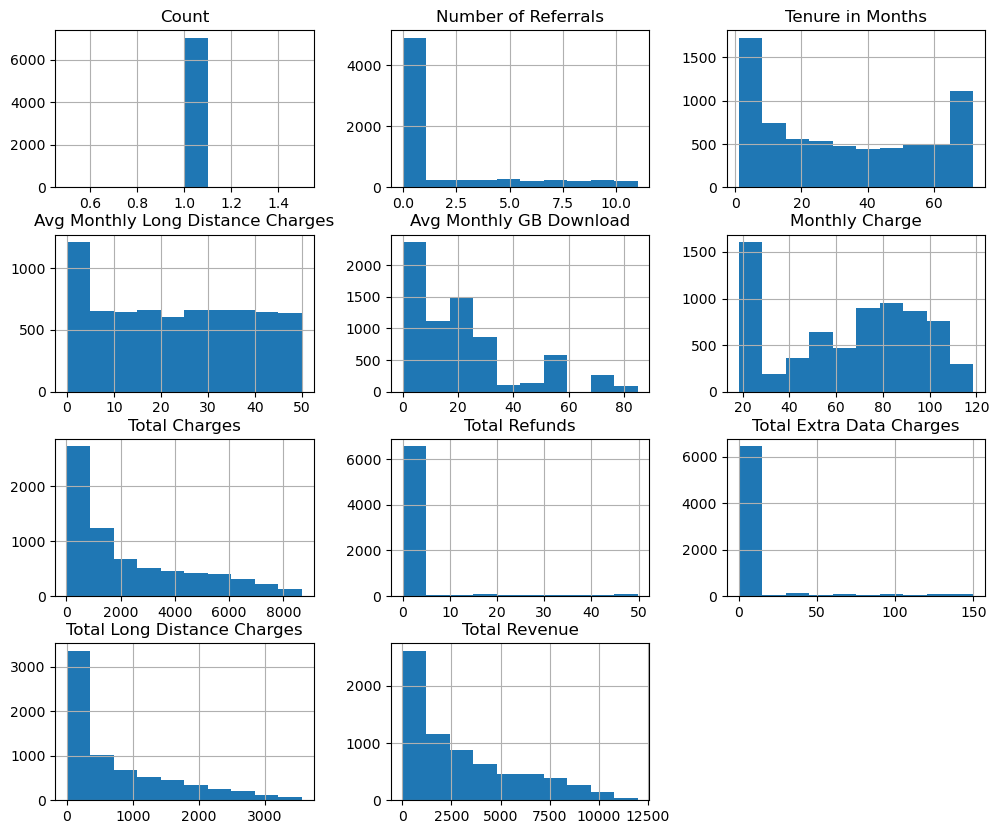

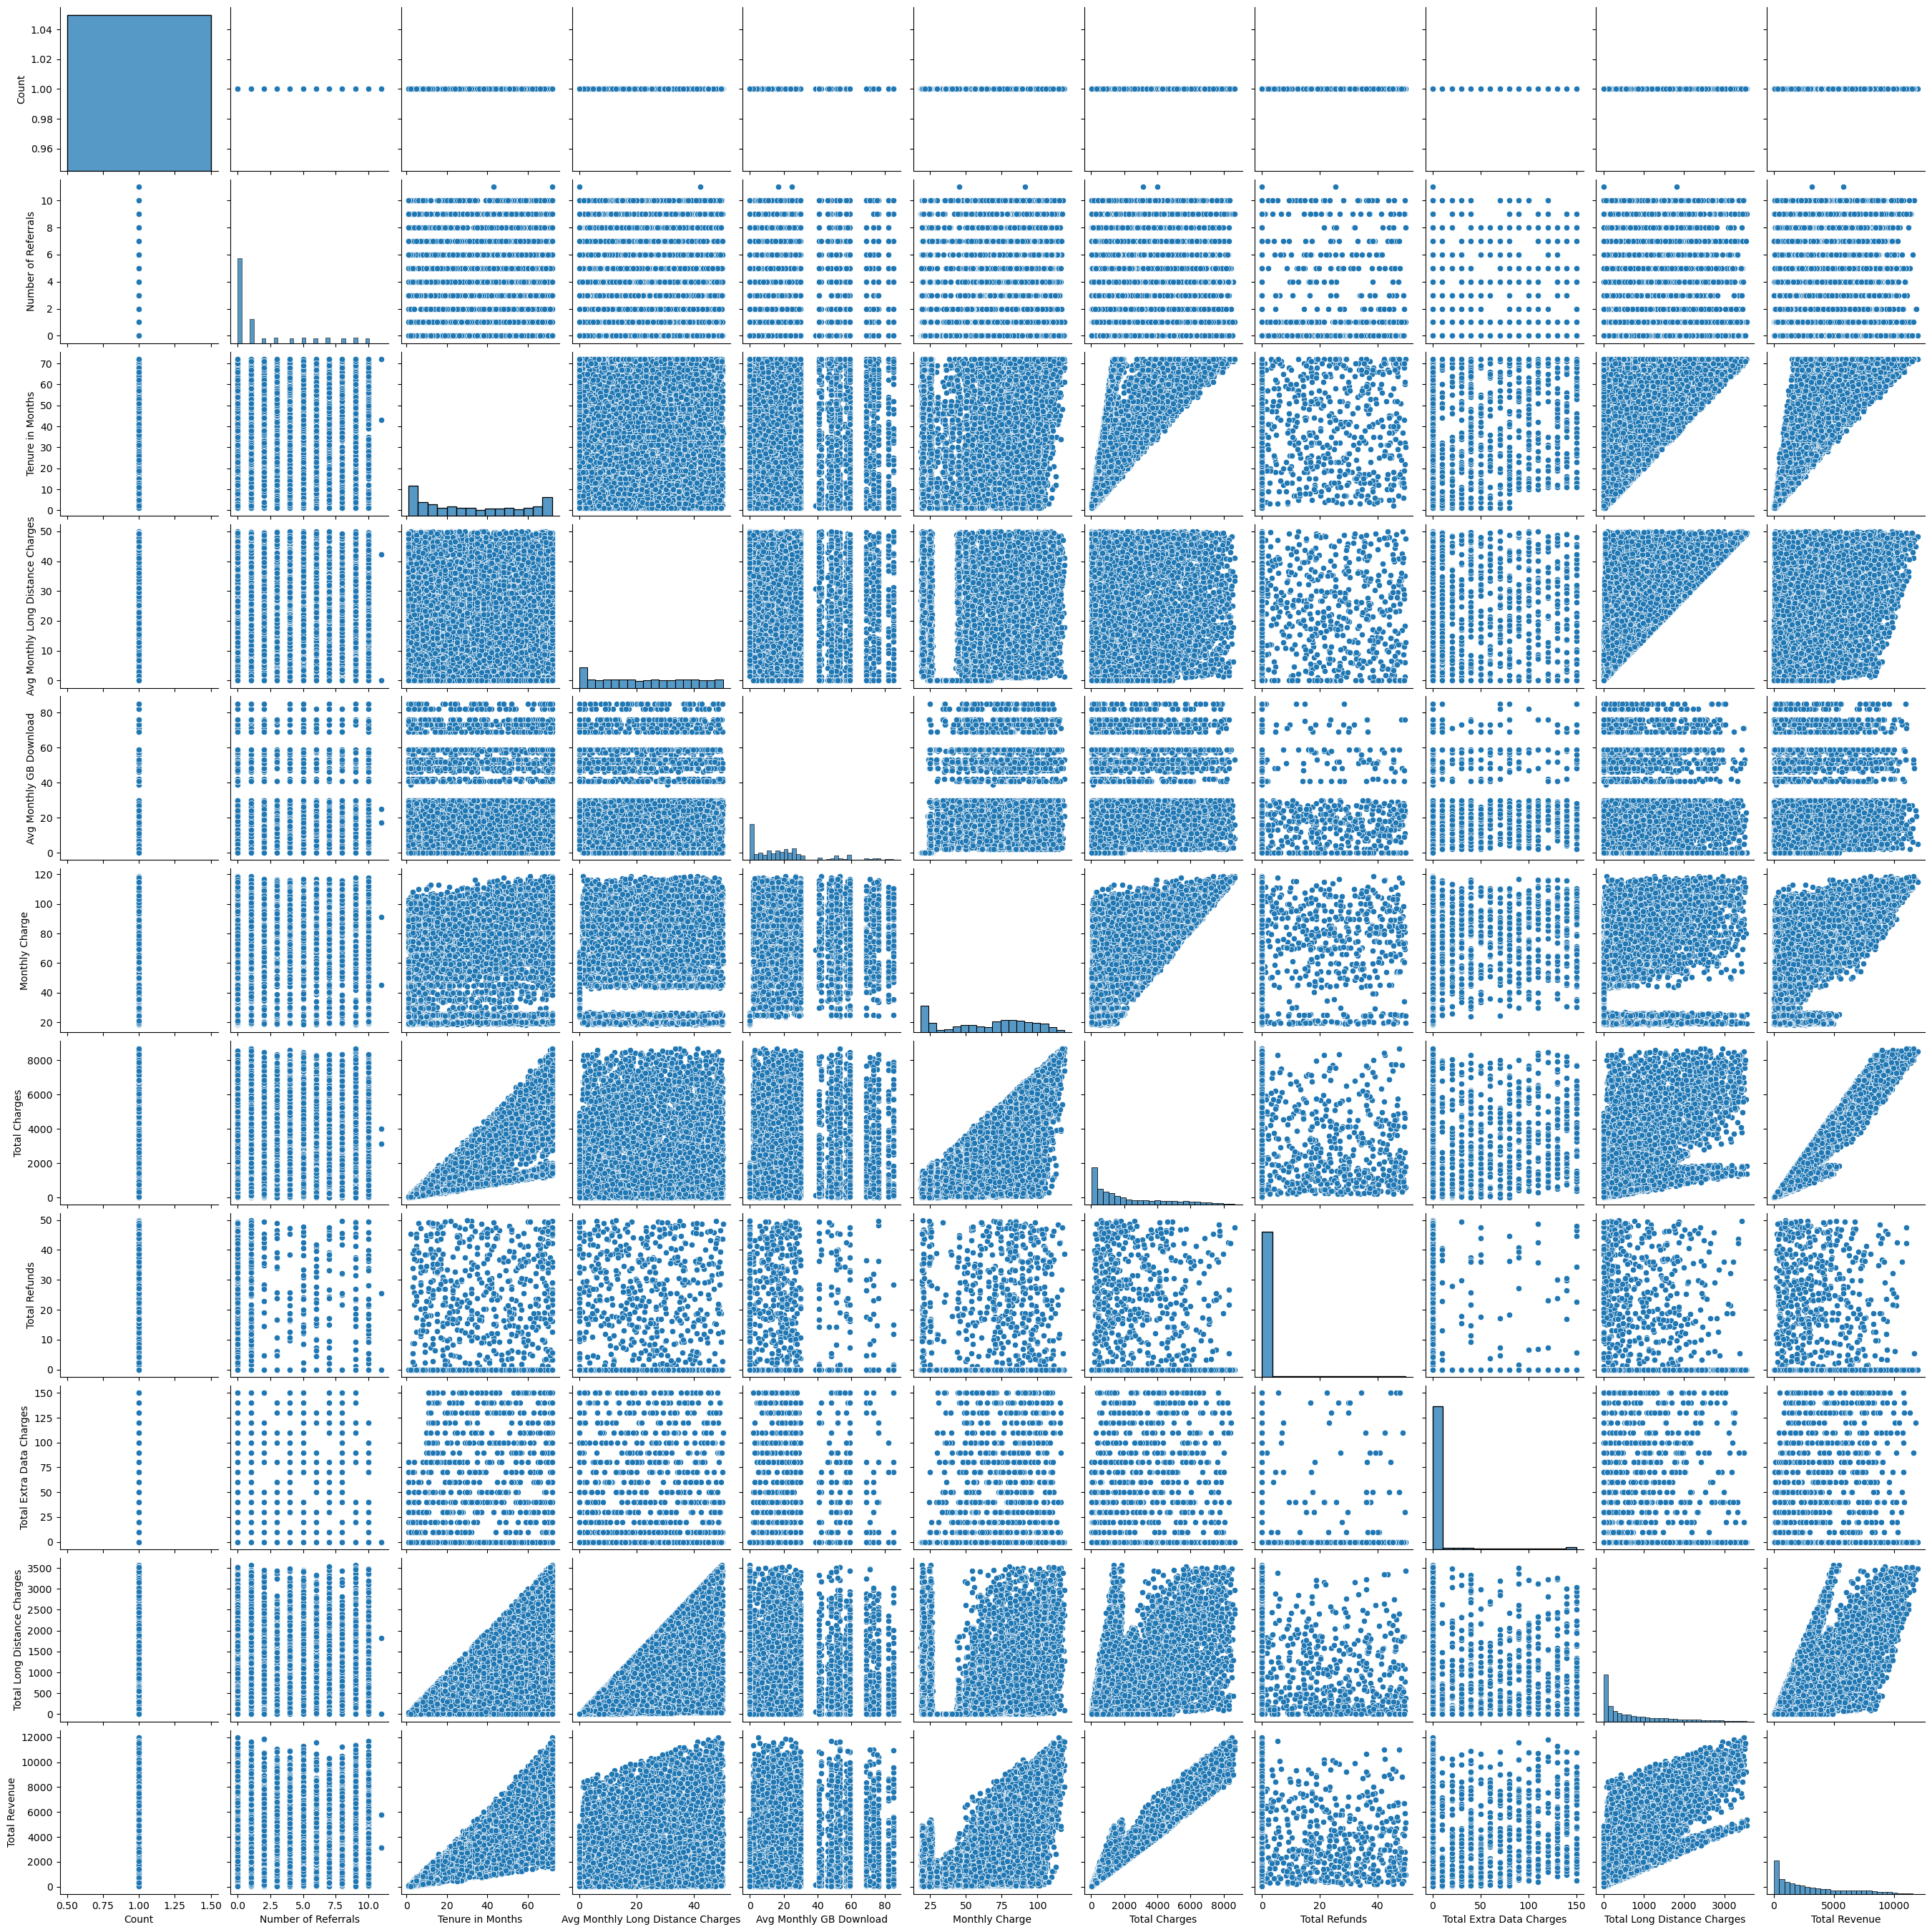

In [3]:
# Summary Statistics
print(data.describe())

# Univariate Analysis (Histograms)
data.hist(figsize=(12, 10))
plt.show()

# Bivariate Analysis (Pairplot)
sns.pairplot(data)
plt.show()

In [4]:
# Handle missing values
data.fillna(method='ffill', inplace=True)

# Convert categorical data to numerical (if any)
data = pd.get_dummies(data)

# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15308\2679183170.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


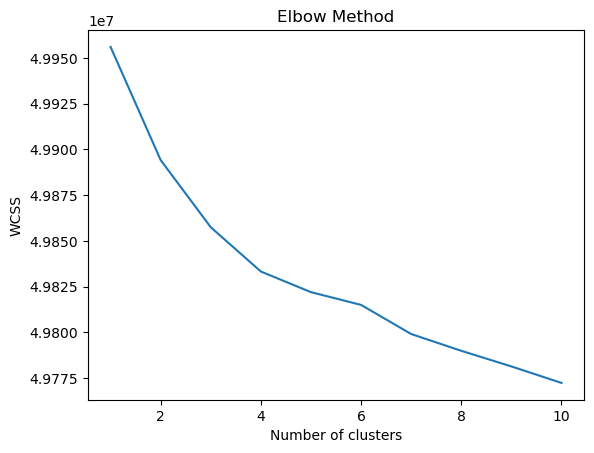

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

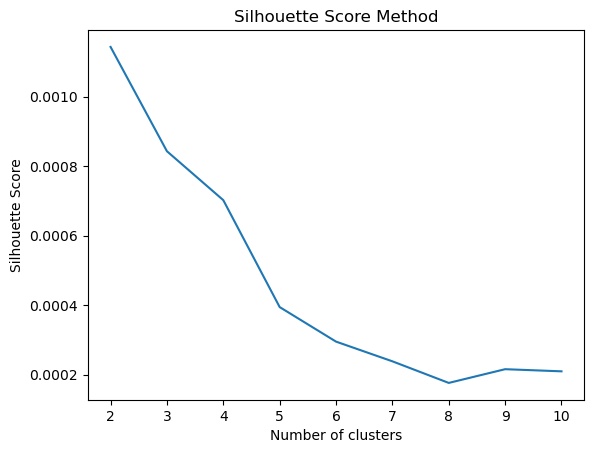

In [6]:
silhouette_scores = []
for n_clusters in range(2, 11):
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    preds = clusterer.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, preds))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

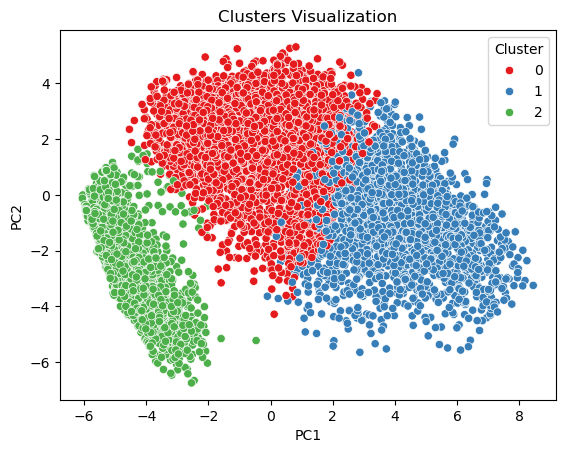

In [7]:
# Assume optimal number of clusters is 3 based on the above methods
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(scaled_data)

# Assign cluster labels to original data
data['Cluster'] = kmeans.labels_

# Visualizing the clusters using PCA (for 2D visualization)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_

sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('Clusters Visualization')
plt.show()

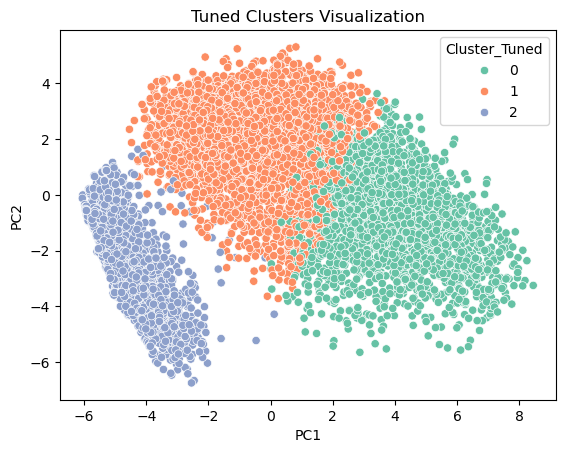

In [8]:
# You can explore different initializations or algorithms
# For example, try using different values for `n_init` or `max_iter`

# Example: Re-running with different n_init
kmeans_tuned = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=500, n_init=20, random_state=42)
kmeans_tuned.fit(scaled_data)

# Re-assign cluster labels and re-visualize if needed
data['Cluster_Tuned'] = kmeans_tuned.labels_

# Visualize the tuned clusters
pca_df['Cluster_Tuned'] = kmeans_tuned.labels_

sns.scatterplot(x='PC1', y='PC2', hue='Cluster_Tuned', data=pca_df, palette='Set2')
plt.title('Tuned Clusters Visualization')
plt.show()

Business Problem:

Description of the business objective.
Identification of constraints.
Data Dictionary:

A detailed description of each feature/column in the dataset.
Exploratory Data Analysis (EDA):

Summary: Basic statistics and data overview.
Univariate Analysis: Analysis of each variable independently.
Bivariate Analysis: Analysis of relationships between pairs of variables.
Data Pre-processing:

Data cleaning, feature engineering, and handling missing values.
Scaling and normalizing the data as required.
Model Building:

K-means Clustering: Building and optimizing the K-means model.
Validation: Evaluating different cluster sizes and deriving insights from the clusters.
Benefits/Impact:

How the solution benefits the business or client.
To proceed, I will create the solution code for each problem in the specified format. However, I'll need the datasets mentioned in the document. If you have them, please upload the following:

1. EastWestAirlines.xlsx
2. crime_data.csv
3. Insurance Dataset.csv
4. Telco_customer_churn.xlsx
5. Autoinsurance.csv

Benefits/Impact
#### Summary of Benefits: 
File-specific adjustments: Replace 'your_dataset.csv' with the actual filenames and adjust the code as needed depending on the dataset format (Excel/CSV).
Further Tuning: Depending on the results, further tuning might be needed, such as exploring different clustering algorithms (e.g., DBSCAN, Hierarchical clustering) or different scaling techniques.

In [ ]:
Add Points in Assignment :
Business objectives : what is minimize ,maximize

libraries used